## Import Libraries

In [ ]:
import os
import torch
import datasets
import timm
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import torch.nn.functional as F
import math
import inspect
import torch.nn as nn
import re
import cv2

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir('drive/MyDrive/Deep Learning Sample')

In [ ]:
os.getcwd()

'/content/drive/MyDrive/Deep Learning Sample'

## Download Imagenet Class Labels

In [ ]:
#@title Imagenet class indices to names
%%capture
CLS2IDX = {0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma maculatum',
 29: 'axolotl, mud puppy, Ambystoma mexicanum',
 30: 'bullfrog, Rana catesbeiana',
 31: 'tree frog, tree-frog',
 32: 'tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui',
 33: 'loggerhead, loggerhead turtle, Caretta caretta',
 34: 'leatherback turtle, leatherback, leathery turtle, Dermochelys coriacea',
 35: 'mud turtle',
 36: 'terrapin',
 37: 'box turtle, box tortoise',
 38: 'banded gecko',
 39: 'common iguana, iguana, Iguana iguana',
 40: 'American chameleon, anole, Anolis carolinensis',
 41: 'whiptail, whiptail lizard',
 42: 'agama',
 43: 'frilled lizard, Chlamydosaurus kingi',
 44: 'alligator lizard',
 45: 'Gila monster, Heloderma suspectum',
 46: 'green lizard, Lacerta viridis',
 47: 'African chameleon, Chamaeleo chamaeleon',
 48: 'Komodo dragon, Komodo lizard, dragon lizard, giant lizard, Varanus komodoensis',
 49: 'African crocodile, Nile crocodile, Crocodylus niloticus',
 50: 'American alligator, Alligator mississipiensis',
 51: 'triceratops',
 52: 'thunder snake, worm snake, Carphophis amoenus',
 53: 'ringneck snake, ring-necked snake, ring snake',
 54: 'hognose snake, puff adder, sand viper',
 55: 'green snake, grass snake',
 56: 'king snake, kingsnake',
 57: 'garter snake, grass snake',
 58: 'water snake',
 59: 'vine snake',
 60: 'night snake, Hypsiglena torquata',
 61: 'boa constrictor, Constrictor constrictor',
 62: 'rock python, rock snake, Python sebae',
 63: 'Indian cobra, Naja naja',
 64: 'green mamba',
 65: 'sea snake',
 66: 'horned viper, cerastes, sand viper, horned asp, Cerastes cornutus',
 67: 'diamondback, diamondback rattlesnake, Crotalus adamanteus',
 68: 'sidewinder, horned rattlesnake, Crotalus cerastes',
 69: 'trilobite',
 70: 'harvestman, daddy longlegs, Phalangium opilio',
 71: 'scorpion',
 72: 'black and gold garden spider, Argiope aurantia',
 73: 'barn spider, Araneus cavaticus',
 74: 'garden spider, Aranea diademata',
 75: 'black widow, Latrodectus mactans',
 76: 'tarantula',
 77: 'wolf spider, hunting spider',
 78: 'tick',
 79: 'centipede',
 80: 'black grouse',
 81: 'ptarmigan',
 82: 'ruffed grouse, partridge, Bonasa umbellus',
 83: 'prairie chicken, prairie grouse, prairie fowl',
 84: 'peacock',
 85: 'quail',
 86: 'partridge',
 87: 'African grey, African gray, Psittacus erithacus',
 88: 'macaw',
 89: 'sulphur-crested cockatoo, Kakatoe galerita, Cacatua galerita',
 90: 'lorikeet',
 91: 'coucal',
 92: 'bee eater',
 93: 'hornbill',
 94: 'hummingbird',
 95: 'jacamar',
 96: 'toucan',
 97: 'drake',
 98: 'red-breasted merganser, Mergus serrator',
 99: 'goose',
 100: 'black swan, Cygnus atratus',
 101: 'tusker',
 102: 'echidna, spiny anteater, anteater',
 103: 'platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus',
 104: 'wallaby, brush kangaroo',
 105: 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus',
 106: 'wombat',
 107: 'jellyfish',
 108: 'sea anemone, anemone',
 109: 'brain coral',
 110: 'flatworm, platyhelminth',
 111: 'nematode, nematode worm, roundworm',
 112: 'conch',
 113: 'snail',
 114: 'slug',
 115: 'sea slug, nudibranch',
 116: 'chiton, coat-of-mail shell, sea cradle, polyplacophore',
 117: 'chambered nautilus, pearly nautilus, nautilus',
 118: 'Dungeness crab, Cancer magister',
 119: 'rock crab, Cancer irroratus',
 120: 'fiddler crab',
 121: 'king crab, Alaska crab, Alaskan king crab, Alaska king crab, Paralithodes camtschatica',
 122: 'American lobster, Northern lobster, Maine lobster, Homarus americanus',
 123: 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish',
 124: 'crayfish, crawfish, crawdad, crawdaddy',
 125: 'hermit crab',
 126: 'isopod',
 127: 'white stork, Ciconia ciconia',
 128: 'black stork, Ciconia nigra',
 129: 'spoonbill',
 130: 'flamingo',
 131: 'little blue heron, Egretta caerulea',
 132: 'American egret, great white heron, Egretta albus',
 133: 'bittern',
 134: 'crane',
 135: 'limpkin, Aramus pictus',
 136: 'European gallinule, Porphyrio porphyrio',
 137: 'American coot, marsh hen, mud hen, water hen, Fulica americana',
 138: 'bustard',
 139: 'ruddy turnstone, Arenaria interpres',
 140: 'red-backed sandpiper, dunlin, Erolia alpina',
 141: 'redshank, Tringa totanus',
 142: 'dowitcher',
 143: 'oystercatcher, oyster catcher',
 144: 'pelican',
 145: 'king penguin, Aptenodytes patagonica',
 146: 'albatross, mollymawk',
 147: 'grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus',
 148: 'killer whale, killer, orca, grampus, sea wolf, Orcinus orca',
 149: 'dugong, Dugong dugon',
 150: 'sea lion',
 151: 'Chihuahua',
 152: 'Japanese spaniel',
 153: 'Maltese dog, Maltese terrier, Maltese',
 154: 'Pekinese, Pekingese, Peke',
 155: 'Shih-Tzu',
 156: 'Blenheim spaniel',
 157: 'papillon',
 158: 'toy terrier',
 159: 'Rhodesian ridgeback',
 160: 'Afghan hound, Afghan',
 161: 'basset, basset hound',
 162: 'beagle',
 163: 'bloodhound, sleuthhound',
 164: 'bluetick',
 165: 'black-and-tan coonhound',
 166: 'Walker hound, Walker foxhound',
 167: 'English foxhound',
 168: 'redbone',
 169: 'borzoi, Russian wolfhound',
 170: 'Irish wolfhound',
 171: 'Italian greyhound',
 172: 'whippet',
 173: 'Ibizan hound, Ibizan Podenco',
 174: 'Norwegian elkhound, elkhound',
 175: 'otterhound, otter hound',
 176: 'Saluki, gazelle hound',
 177: 'Scottish deerhound, deerhound',
 178: 'Weimaraner',
 179: 'Staffordshire bullterrier, Staffordshire bull terrier',
 180: 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier',
 181: 'Bedlington terrier',
 182: 'Border terrier',
 183: 'Kerry blue terrier',
 184: 'Irish terrier',
 185: 'Norfolk terrier',
 186: 'Norwich terrier',
 187: 'Yorkshire terrier',
 188: 'wire-haired fox terrier',
 189: 'Lakeland terrier',
 190: 'Sealyham terrier, Sealyham',
 191: 'Airedale, Airedale terrier',
 192: 'cairn, cairn terrier',
 193: 'Australian terrier',
 194: 'Dandie Dinmont, Dandie Dinmont terrier',
 195: 'Boston bull, Boston terrier',
 196: 'miniature schnauzer',
 197: 'giant schnauzer',
 198: 'standard schnauzer',
 199: 'Scotch terrier, Scottish terrier, Scottie',
 200: 'Tibetan terrier, chrysanthemum dog',
 201: 'silky terrier, Sydney silky',
 202: 'soft-coated wheaten terrier',
 203: 'West Highland white terrier',
 204: 'Lhasa, Lhasa apso',
 205: 'flat-coated retriever',
 206: 'curly-coated retriever',
 207: 'golden retriever',
 208: 'Labrador retriever',
 209: 'Chesapeake Bay retriever',
 210: 'German short-haired pointer',
 211: 'vizsla, Hungarian pointer',
 212: 'English setter',
 213: 'Irish setter, red setter',
 214: 'Gordon setter',
 215: 'Brittany spaniel',
 216: 'clumber, clumber spaniel',
 217: 'English springer, English springer spaniel',
 218: 'Welsh springer spaniel',
 219: 'cocker spaniel, English cocker spaniel, cocker',
 220: 'Sussex spaniel',
 221: 'Irish water spaniel',
 222: 'kuvasz',
 223: 'schipperke',
 224: 'groenendael',
 225: 'malinois',
 226: 'briard',
 227: 'kelpie',
 228: 'komondor',
 229: 'Old English sheepdog, bobtail',
 230: 'Shetland sheepdog, Shetland sheep dog, Shetland',
 231: 'collie',
 232: 'Border collie',
 233: 'Bouvier des Flandres, Bouviers des Flandres',
 234: 'Rottweiler',
 235: 'German shepherd, German shepherd dog, German police dog, alsatian',
 236: 'Doberman, Doberman pinscher',
 237: 'miniature pinscher',
 238: 'Greater Swiss Mountain dog',
 239: 'Bernese mountain dog',
 240: 'Appenzeller',
 241: 'EntleBucher',
 242: 'boxer',
 243: 'bull mastiff',
 244: 'Tibetan mastiff',
 245: 'French bulldog',
 246: 'Great Dane',
 247: 'Saint Bernard, St Bernard',
 248: 'Eskimo dog, husky',
 249: 'malamute, malemute, Alaskan malamute',
 250: 'Siberian husky',
 251: 'dalmatian, coach dog, carriage dog',
 252: 'affenpinscher, monkey pinscher, monkey dog',
 253: 'basenji',
 254: 'pug, pug-dog',
 255: 'Leonberg',
 256: 'Newfoundland, Newfoundland dog',
 257: 'Great Pyrenees',
 258: 'Samoyed, Samoyede',
 259: 'Pomeranian',
 260: 'chow, chow chow',
 261: 'keeshond',
 262: 'Brabancon griffon',
 263: 'Pembroke, Pembroke Welsh corgi',
 264: 'Cardigan, Cardigan Welsh corgi',
 265: 'toy poodle',
 266: 'miniature poodle',
 267: 'standard poodle',
 268: 'Mexican hairless',
 269: 'timber wolf, grey wolf, gray wolf, Canis lupus',
 270: 'white wolf, Arctic wolf, Canis lupus tundrarum',
 271: 'red wolf, maned wolf, Canis rufus, Canis niger',
 272: 'coyote, prairie wolf, brush wolf, Canis latrans',
 273: 'dingo, warrigal, warragal, Canis dingo',
 274: 'dhole, Cuon alpinus',
 275: 'African hunting dog, hyena dog, Cape hunting dog, Lycaon pictus',
 276: 'hyena, hyaena',
 277: 'red fox, Vulpes vulpes',
 278: 'kit fox, Vulpes macrotis',
 279: 'Arctic fox, white fox, Alopex lagopus',
 280: 'grey fox, gray fox, Urocyon cinereoargenteus',
 281: 'tabby, tabby cat',
 282: 'tiger cat',
 283: 'Persian cat',
 284: 'Siamese cat, Siamese',
 285: 'Egyptian cat',
 286: 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor',
 287: 'lynx, catamount',
 288: 'leopard, Panthera pardus',
 289: 'snow leopard, ounce, Panthera uncia',
 290: 'jaguar, panther, Panthera onca, Felis onca',
 291: 'lion, king of beasts, Panthera leo',
 292: 'tiger, Panthera tigris',
 293: 'cheetah, chetah, Acinonyx jubatus',
 294: 'brown bear, bruin, Ursus arctos',
 295: 'American black bear, black bear, Ursus americanus, Euarctos americanus',
 296: 'ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus',
 297: 'sloth bear, Melursus ursinus, Ursus ursinus',
 298: 'mongoose',
 299: 'meerkat, mierkat',
 300: 'tiger beetle',
 301: 'ladybug, ladybeetle, lady beetle, ladybird, ladybird beetle',
 302: 'ground beetle, carabid beetle',
 303: 'long-horned beetle, longicorn, longicorn beetle',
 304: 'leaf beetle, chrysomelid',
 305: 'dung beetle',
 306: 'rhinoceros beetle',
 307: 'weevil',
 308: 'fly',
 309: 'bee',
 310: 'ant, emmet, pismire',
 311: 'grasshopper, hopper',
 312: 'cricket',
 313: 'walking stick, walkingstick, stick insect',
 314: 'cockroach, roach',
 315: 'mantis, mantid',
 316: 'cicada, cicala',
 317: 'leafhopper',
 318: 'lacewing, lacewing fly',
 319: "dragonfly, darning needle, devil's darning needle, sewing needle, snake feeder, snake doctor, mosquito hawk, skeeter hawk",
 320: 'damselfly',
 321: 'admiral',
 322: 'ringlet, ringlet butterfly',
 323: 'monarch, monarch butterfly, milkweed butterfly, Danaus plexippus',
 324: 'cabbage butterfly',
 325: 'sulphur butterfly, sulfur butterfly',
 326: 'lycaenid, lycaenid butterfly',
 327: 'starfish, sea star',
 328: 'sea urchin',
 329: 'sea cucumber, holothurian',
 330: 'wood rabbit, cottontail, cottontail rabbit',
 331: 'hare',
 332: 'Angora, Angora rabbit',
 333: 'hamster',
 334: 'porcupine, hedgehog',
 335: 'fox squirrel, eastern fox squirrel, Sciurus niger',
 336: 'marmot',
 337: 'beaver',
 338: 'guinea pig, Cavia cobaya',
 339: 'sorrel',
 340: 'zebra',
 341: 'hog, pig, grunter, squealer, Sus scrofa',
 342: 'wild boar, boar, Sus scrofa',
 343: 'warthog',
 344: 'hippopotamus, hippo, river horse, Hippopotamus amphibius',
 345: 'ox',
 346: 'water buffalo, water ox, Asiatic buffalo, Bubalus bubalis',
 347: 'bison',
 348: 'ram, tup',
 349: 'bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis',
 350: 'ibex, Capra ibex',
 351: 'hartebeest',
 352: 'impala, Aepyceros melampus',
 353: 'gazelle',
 354: 'Arabian camel, dromedary, Camelus dromedarius',
 355: 'llama',
 356: 'weasel',
 357: 'mink',
 358: 'polecat, fitch, foulmart, foumart, Mustela putorius',
 359: 'black-footed ferret, ferret, Mustela nigripes',
 360: 'otter',
 361: 'skunk, polecat, wood pussy',
 362: 'badger',
 363: 'armadillo',
 364: 'three-toed sloth, ai, Bradypus tridactylus',
 365: 'orangutan, orang, orangutang, Pongo pygmaeus',
 366: 'gorilla, Gorilla gorilla',
 367: 'chimpanzee, chimp, Pan troglodytes',
 368: 'gibbon, Hylobates lar',
 369: 'siamang, Hylobates syndactylus, Symphalangus syndactylus',
 370: 'guenon, guenon monkey',
 371: 'patas, hussar monkey, Erythrocebus patas',
 372: 'baboon',
 373: 'macaque',
 374: 'langur',
 375: 'colobus, colobus monkey',
 376: 'proboscis monkey, Nasalis larvatus',
 377: 'marmoset',
 378: 'capuchin, ringtail, Cebus capucinus',
 379: 'howler monkey, howler',
 380: 'titi, titi monkey',
 381: 'spider monkey, Ateles geoffroyi',
 382: 'squirrel monkey, Saimiri sciureus',
 383: 'Madagascar cat, ring-tailed lemur, Lemur catta',
 384: 'indri, indris, Indri indri, Indri brevicaudatus',
 385: 'Indian elephant, Elephas maximus',
 386: 'African elephant, Loxodonta africana',
 387: 'lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens',
 388: 'giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca',
 389: 'barracouta, snoek',
 390: 'eel',
 391: 'coho, cohoe, coho salmon, blue jack, silver salmon, Oncorhynchus kisutch',
 392: 'rock beauty, Holocanthus tricolor',
 393: 'anemone fish',
 394: 'sturgeon',
 395: 'gar, garfish, garpike, billfish, Lepisosteus osseus',
 396: 'lionfish',
 397: 'puffer, pufferfish, blowfish, globefish',
 398: 'abacus',
 399: 'abaya',
 400: "academic gown, academic robe, judge's robe",
 401: 'accordion, piano accordion, squeeze box',
 402: 'acoustic guitar',
 403: 'aircraft carrier, carrier, flattop, attack aircraft carrier',
 404: 'airliner',
 405: 'airship, dirigible',
 406: 'altar',
 407: 'ambulance',
 408: 'amphibian, amphibious vehicle',
 409: 'analog clock',
 410: 'apiary, bee house',
 411: 'apron',
 412: 'ashcan, trash can, garbage can, wastebin, ash bin, ash-bin, ashbin, dustbin, trash barrel, trash bin',
 413: 'assault rifle, assault gun',
 414: 'backpack, back pack, knapsack, packsack, rucksack, haversack',
 415: 'bakery, bakeshop, bakehouse',
 416: 'balance beam, beam',
 417: 'balloon',
 418: 'ballpoint, ballpoint pen, ballpen, Biro',
 419: 'Band Aid',
 420: 'banjo',
 421: 'bannister, banister, balustrade, balusters, handrail',
 422: 'barbell',
 423: 'barber chair',
 424: 'barbershop',
 425: 'barn',
 426: 'barometer',
 427: 'barrel, cask',
 428: 'barrow, garden cart, lawn cart, wheelbarrow',
 429: 'baseball',
 430: 'basketball',
 431: 'bassinet',
 432: 'bassoon',
 433: 'bathing cap, swimming cap',
 434: 'bath towel',
 435: 'bathtub, bathing tub, bath, tub',
 436: 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon',
 437: 'beacon, lighthouse, beacon light, pharos',
 438: 'beaker',
 439: 'bearskin, busby, shako',
 440: 'beer bottle',
 441: 'beer glass',
 442: 'bell cote, bell cot',
 443: 'bib',
 444: 'bicycle-built-for-two, tandem bicycle, tandem',
 445: 'bikini, two-piece',
 446: 'binder, ring-binder',
 447: 'binoculars, field glasses, opera glasses',
 448: 'birdhouse',
 449: 'boathouse',
 450: 'bobsled, bobsleigh, bob',
 451: 'bolo tie, bolo, bola tie, bola',
 452: 'bonnet, poke bonnet',
 453: 'bookcase',
 454: 'bookshop, bookstore, bookstall',
 455: 'bottlecap',
 456: 'bow',
 457: 'bow tie, bow-tie, bowtie',
 458: 'brass, memorial tablet, plaque',
 459: 'brassiere, bra, bandeau',
 460: 'breakwater, groin, groyne, mole, bulwark, seawall, jetty',
 461: 'breastplate, aegis, egis',
 462: 'broom',
 463: 'bucket, pail',
 464: 'buckle',
 465: 'bulletproof vest',
 466: 'bullet train, bullet',
 467: 'butcher shop, meat market',
 468: 'cab, hack, taxi, taxicab',
 469: 'caldron, cauldron',
 470: 'candle, taper, wax light',
 471: 'cannon',
 472: 'canoe',
 473: 'can opener, tin opener',
 474: 'cardigan',
 475: 'car mirror',
 476: 'carousel, carrousel, merry-go-round, roundabout, whirligig',
 477: "carpenter's kit, tool kit",
 478: 'carton',
 479: 'car wheel',
 480: 'cash machine, cash dispenser, automated teller machine, automatic teller machine, automated teller, automatic teller, ATM',
 481: 'cassette',
 482: 'cassette player',
 483: 'castle',
 484: 'catamaran',
 485: 'CD player',
 486: 'cello, violoncello',
 487: 'cellular telephone, cellular phone, cellphone, cell, mobile phone',
 488: 'chain',
 489: 'chainlink fence',
 490: 'chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour',
 491: 'chain saw, chainsaw',
 492: 'chest',
 493: 'chiffonier, commode',
 494: 'chime, bell, gong',
 495: 'china cabinet, china closet',
 496: 'Christmas stocking',
 497: 'church, church building',
 498: 'cinema, movie theater, movie theatre, movie house, picture palace',
 499: 'cleaver, meat cleaver, chopper',
 500: 'cliff dwelling',
 501: 'cloak',
 502: 'clog, geta, patten, sabot',
 503: 'cocktail shaker',
 504: 'coffee mug',
 505: 'coffeepot',
 506: 'coil, spiral, volute, whorl, helix',
 507: 'combination lock',
 508: 'computer keyboard, keypad',
 509: 'confectionery, confectionary, candy store',
 510: 'container ship, containership, container vessel',
 511: 'convertible',
 512: 'corkscrew, bottle screw',
 513: 'cornet, horn, trumpet, trump',
 514: 'cowboy boot',
 515: 'cowboy hat, ten-gallon hat',
 516: 'cradle',
 517: 'crane',
 518: 'crash helmet',
 519: 'crate',
 520: 'crib, cot',
 521: 'Crock Pot',
 522: 'croquet ball',
 523: 'crutch',
 524: 'cuirass',
 525: 'dam, dike, dyke',
 526: 'desk',
 527: 'desktop computer',
 528: 'dial telephone, dial phone',
 529: 'diaper, nappy, napkin',
 530: 'digital clock',
 531: 'digital watch',
 532: 'dining table, board',
 533: 'dishrag, dishcloth',
 534: 'dishwasher, dish washer, dishwashing machine',
 535: 'disk brake, disc brake',
 536: 'dock, dockage, docking facility',
 537: 'dogsled, dog sled, dog sleigh',
 538: 'dome',
 539: 'doormat, welcome mat',
 540: 'drilling platform, offshore rig',
 541: 'drum, membranophone, tympan',
 542: 'drumstick',
 543: 'dumbbell',
 544: 'Dutch oven',
 545: 'electric fan, blower',
 546: 'electric guitar',
 547: 'electric locomotive',
 548: 'entertainment center',
 549: 'envelope',
 550: 'espresso maker',
 551: 'face powder',
 552: 'feather boa, boa',
 553: 'file, file cabinet, filing cabinet',
 554: 'fireboat',
 555: 'fire engine, fire truck',
 556: 'fire screen, fireguard',
 557: 'flagpole, flagstaff',
 558: 'flute, transverse flute',
 559: 'folding chair',
 560: 'football helmet',
 561: 'forklift',
 562: 'fountain',
 563: 'fountain pen',
 564: 'four-poster',
 565: 'freight car',
 566: 'French horn, horn',
 567: 'frying pan, frypan, skillet',
 568: 'fur coat',
 569: 'garbage truck, dustcart',
 570: 'gasmask, respirator, gas helmet',
 571: 'gas pump, gasoline pump, petrol pump, island dispenser',
 572: 'goblet',
 573: 'go-kart',
 574: 'golf ball',
 575: 'golfcart, golf cart',
 576: 'gondola',
 577: 'gong, tam-tam',
 578: 'gown',
 579: 'grand piano, grand',
 580: 'greenhouse, nursery, glasshouse',
 581: 'grille, radiator grille',
 582: 'grocery store, grocery, food market, market',
 583: 'guillotine',
 584: 'hair slide',
 585: 'hair spray',
 586: 'half track',
 587: 'hammer',
 588: 'hamper',
 589: 'hand blower, blow dryer, blow drier, hair dryer, hair drier',
 590: 'hand-held computer, hand-held microcomputer',
 591: 'handkerchief, hankie, hanky, hankey',
 592: 'hard disc, hard disk, fixed disk',
 593: 'harmonica, mouth organ, harp, mouth harp',
 594: 'harp',
 595: 'harvester, reaper',
 596: 'hatchet',
 597: 'holster',
 598: 'home theater, home theatre',
 599: 'honeycomb',
 600: 'hook, claw',
 601: 'hoopskirt, crinoline',
 602: 'horizontal bar, high bar',
 603: 'horse cart, horse-cart',
 604: 'hourglass',
 605: 'iPod',
 606: 'iron, smoothing iron',
 607: "jack-o'-lantern",
 608: 'jean, blue jean, denim',
 609: 'jeep, landrover',
 610: 'jersey, T-shirt, tee shirt',
 611: 'jigsaw puzzle',
 612: 'jinrikisha, ricksha, rickshaw',
 613: 'joystick',
 614: 'kimono',
 615: 'knee pad',
 616: 'knot',
 617: 'lab coat, laboratory coat',
 618: 'ladle',
 619: 'lampshade, lamp shade',
 620: 'laptop, laptop computer',
 621: 'lawn mower, mower',
 622: 'lens cap, lens cover',
 623: 'letter opener, paper knife, paperknife',
 624: 'library',
 625: 'lifeboat',
 626: 'lighter, light, igniter, ignitor',
 627: 'limousine, limo',
 628: 'liner, ocean liner',
 629: 'lipstick, lip rouge',
 630: 'Loafer',
 631: 'lotion',
 632: 'loudspeaker, speaker, speaker unit, loudspeaker system, speaker system',
 633: "loupe, jeweler's loupe",
 634: 'lumbermill, sawmill',
 635: 'magnetic compass',
 636: 'mailbag, postbag',
 637: 'mailbox, letter box',
 638: 'maillot',
 639: 'maillot, tank suit',
 640: 'manhole cover',
 641: 'maraca',
 642: 'marimba, xylophone',
 643: 'mask',
 644: 'matchstick',
 645: 'maypole',
 646: 'maze, labyrinth',
 647: 'measuring cup',
 648: 'medicine chest, medicine cabinet',
 649: 'megalith, megalithic structure',
 650: 'microphone, mike',
 651: 'microwave, microwave oven',
 652: 'military uniform',
 653: 'milk can',
 654: 'minibus',
 655: 'miniskirt, mini',
 656: 'minivan',
 657: 'missile',
 658: 'mitten',
 659: 'mixing bowl',
 660: 'mobile home, manufactured home',
 661: 'Model T',
 662: 'modem',
 663: 'monastery',
 664: 'monitor',
 665: 'moped',
 666: 'mortar',
 667: 'mortarboard',
 668: 'mosque',
 669: 'mosquito net',
 670: 'motor scooter, scooter',
 671: 'mountain bike, all-terrain bike, off-roader',
 672: 'mountain tent',
 673: 'mouse, computer mouse',
 674: 'mousetrap',
 675: 'moving van',
 676: 'muzzle',
 677: 'nail',
 678: 'neck brace',
 679: 'necklace',
 680: 'nipple',
 681: 'notebook, notebook computer',
 682: 'obelisk',
 683: 'oboe, hautboy, hautbois',
 684: 'ocarina, sweet potato',
 685: 'odometer, hodometer, mileometer, milometer',
 686: 'oil filter',
 687: 'organ, pipe organ',
 688: 'oscilloscope, scope, cathode-ray oscilloscope, CRO',
 689: 'overskirt',
 690: 'oxcart',
 691: 'oxygen mask',
 692: 'packet',
 693: 'paddle, boat paddle',
 694: 'paddlewheel, paddle wheel',
 695: 'padlock',
 696: 'paintbrush',
 697: "pajama, pyjama, pj's, jammies",
 698: 'palace',
 699: 'panpipe, pandean pipe, syrinx',
 700: 'paper towel',
 701: 'parachute, chute',
 702: 'parallel bars, bars',
 703: 'park bench',
 704: 'parking meter',
 705: 'passenger car, coach, carriage',
 706: 'patio, terrace',
 707: 'pay-phone, pay-station',
 708: 'pedestal, plinth, footstall',
 709: 'pencil box, pencil case',
 710: 'pencil sharpener',
 711: 'perfume, essence',
 712: 'Petri dish',
 713: 'photocopier',
 714: 'pick, plectrum, plectron',
 715: 'pickelhaube',
 716: 'picket fence, paling',
 717: 'pickup, pickup truck',
 718: 'pier',
 719: 'piggy bank, penny bank',
 720: 'pill bottle',
 721: 'pillow',
 722: 'ping-pong ball',
 723: 'pinwheel',
 724: 'pirate, pirate ship',
 725: 'pitcher, ewer',
 726: "plane, carpenter's plane, woodworking plane",
 727: 'planetarium',
 728: 'plastic bag',
 729: 'plate rack',
 730: 'plow, plough',
 731: "plunger, plumber's helper",
 732: 'Polaroid camera, Polaroid Land camera',
 733: 'pole',
 734: 'police van, police wagon, paddy wagon, patrol wagon, wagon, black Maria',
 735: 'poncho',
 736: 'pool table, billiard table, snooker table',
 737: 'pop bottle, soda bottle',
 738: 'pot, flowerpot',
 739: "potter's wheel",
 740: 'power drill',
 741: 'prayer rug, prayer mat',
 742: 'printer',
 743: 'prison, prison house',
 744: 'projectile, missile',
 745: 'projector',
 746: 'puck, hockey puck',
 747: 'punching bag, punch bag, punching ball, punchball',
 748: 'purse',
 749: 'quill, quill pen',
 750: 'quilt, comforter, comfort, puff',
 751: 'racer, race car, racing car',
 752: 'racket, racquet',
 753: 'radiator',
 754: 'radio, wireless',
 755: 'radio telescope, radio reflector',
 756: 'rain barrel',
 757: 'recreational vehicle, RV, R.V.',
 758: 'reel',
 759: 'reflex camera',
 760: 'refrigerator, icebox',
 761: 'remote control, remote',
 762: 'restaurant, eating house, eating place, eatery',
 763: 'revolver, six-gun, six-shooter',
 764: 'rifle',
 765: 'rocking chair, rocker',
 766: 'rotisserie',
 767: 'rubber eraser, rubber, pencil eraser',
 768: 'rugby ball',
 769: 'rule, ruler',
 770: 'running shoe',
 771: 'safe',
 772: 'safety pin',
 773: 'saltshaker, salt shaker',
 774: 'sandal',
 775: 'sarong',
 776: 'sax, saxophone',
 777: 'scabbard',
 778: 'scale, weighing machine',
 779: 'school bus',
 780: 'schooner',
 781: 'scoreboard',
 782: 'screen, CRT screen',
 783: 'screw',
 784: 'screwdriver',
 785: 'seat belt, seatbelt',
 786: 'sewing machine',
 787: 'shield, buckler',
 788: 'shoe shop, shoe-shop, shoe store',
 789: 'shoji',
 790: 'shopping basket',
 791: 'shopping cart',
 792: 'shovel',
 793: 'shower cap',
 794: 'shower curtain',
 795: 'ski',
 796: 'ski mask',
 797: 'sleeping bag',
 798: 'slide rule, slipstick',
 799: 'sliding door',
 800: 'slot, one-armed bandit',
 801: 'snorkel',
 802: 'snowmobile',
 803: 'snowplow, snowplough',
 804: 'soap dispenser',
 805: 'soccer ball',
 806: 'sock',
 807: 'solar dish, solar collector, solar furnace',
 808: 'sombrero',
 809: 'soup bowl',
 810: 'space bar',
 811: 'space heater',
 812: 'space shuttle',
 813: 'spatula',
 814: 'speedboat',
 815: "spider web, spider's web",
 816: 'spindle',
 817: 'sports car, sport car',
 818: 'spotlight, spot',
 819: 'stage',
 820: 'steam locomotive',
 821: 'steel arch bridge',
 822: 'steel drum',
 823: 'stethoscope',
 824: 'stole',
 825: 'stone wall',
 826: 'stopwatch, stop watch',
 827: 'stove',
 828: 'strainer',
 829: 'streetcar, tram, tramcar, trolley, trolley car',
 830: 'stretcher',
 831: 'studio couch, day bed',
 832: 'stupa, tope',
 833: 'submarine, pigboat, sub, U-boat',
 834: 'suit, suit of clothes',
 835: 'sundial',
 836: 'sunglass',
 837: 'sunglasses, dark glasses, shades',
 838: 'sunscreen, sunblock, sun blocker',
 839: 'suspension bridge',
 840: 'swab, swob, mop',
 841: 'sweatshirt',
 842: 'swimming trunks, bathing trunks',
 843: 'swing',
 844: 'switch, electric switch, electrical switch',
 845: 'syringe',
 846: 'table lamp',
 847: 'tank, army tank, armored combat vehicle, armoured combat vehicle',
 848: 'tape player',
 849: 'teapot',
 850: 'teddy, teddy bear',
 851: 'television, television system',
 852: 'tennis ball',
 853: 'thatch, thatched roof',
 854: 'theater curtain, theatre curtain',
 855: 'thimble',
 856: 'thresher, thrasher, threshing machine',
 857: 'throne',
 858: 'tile roof',
 859: 'toaster',
 860: 'tobacco shop, tobacconist shop, tobacconist',
 861: 'toilet seat',
 862: 'torch',
 863: 'totem pole',
 864: 'tow truck, tow car, wrecker',
 865: 'toyshop',
 866: 'tractor',
 867: 'trailer truck, tractor trailer, trucking rig, rig, articulated lorry, semi',
 868: 'tray',
 869: 'trench coat',
 870: 'tricycle, trike, velocipede',
 871: 'trimaran',
 872: 'tripod',
 873: 'triumphal arch',
 874: 'trolleybus, trolley coach, trackless trolley',
 875: 'trombone',
 876: 'tub, vat',
 877: 'turnstile',
 878: 'typewriter keyboard',
 879: 'umbrella',
 880: 'unicycle, monocycle',
 881: 'upright, upright piano',
 882: 'vacuum, vacuum cleaner',
 883: 'vase',
 884: 'vault',
 885: 'velvet',
 886: 'vending machine',
 887: 'vestment',
 888: 'viaduct',
 889: 'violin, fiddle',
 890: 'volleyball',
 891: 'waffle iron',
 892: 'wall clock',
 893: 'wallet, billfold, notecase, pocketbook',
 894: 'wardrobe, closet, press',
 895: 'warplane, military plane',
 896: 'washbasin, handbasin, washbowl, lavabo, wash-hand basin',
 897: 'washer, automatic washer, washing machine',
 898: 'water bottle',
 899: 'water jug',
 900: 'water tower',
 901: 'whiskey jug',
 902: 'whistle',
 903: 'wig',
 904: 'window screen',
 905: 'window shade',
 906: 'Windsor tie',
 907: 'wine bottle',
 908: 'wing',
 909: 'wok',
 910: 'wooden spoon',
 911: 'wool, woolen, woollen',
 912: 'worm fence, snake fence, snake-rail fence, Virginia fence',
 913: 'wreck',
 914: 'yawl',
 915: 'yurt',
 916: 'web site, website, internet site, site',
 917: 'comic book',
 918: 'crossword puzzle, crossword',
 919: 'street sign',
 920: 'traffic light, traffic signal, stoplight',
 921: 'book jacket, dust cover, dust jacket, dust wrapper',
 922: 'menu',
 923: 'plate',
 924: 'guacamole',
 925: 'consomme',
 926: 'hot pot, hotpot',
 927: 'trifle',
 928: 'ice cream, icecream',
 929: 'ice lolly, lolly, lollipop, popsicle',
 930: 'French loaf',
 931: 'bagel, beigel',
 932: 'pretzel',
 933: 'cheeseburger',
 934: 'hotdog, hot dog, red hot',
 935: 'mashed potato',
 936: 'head cabbage',
 937: 'broccoli',
 938: 'cauliflower',
 939: 'zucchini, courgette',
 940: 'spaghetti squash',
 941: 'acorn squash',
 942: 'butternut squash',
 943: 'cucumber, cuke',
 944: 'artichoke, globe artichoke',
 945: 'bell pepper',
 946: 'cardoon',
 947: 'mushroom',
 948: 'Granny Smith',
 949: 'strawberry',
 950: 'orange',
 951: 'lemon',
 952: 'fig',
 953: 'pineapple, ananas',
 954: 'banana',
 955: 'jackfruit, jak, jack',
 956: 'custard apple',
 957: 'pomegranate',
 958: 'hay',
 959: 'carbonara',
 960: 'chocolate sauce, chocolate syrup',
 961: 'dough',
 962: 'meat loaf, meatloaf',
 963: 'pizza, pizza pie',
 964: 'potpie',
 965: 'burrito',
 966: 'red wine',
 967: 'espresso',
 968: 'cup',
 969: 'eggnog',
 970: 'alp',
 971: 'bubble',
 972: 'cliff, drop, drop-off',
 973: 'coral reef',
 974: 'geyser',
 975: 'lakeside, lakeshore',
 976: 'promontory, headland, head, foreland',
 977: 'sandbar, sand bar',
 978: 'seashore, coast, seacoast, sea-coast',
 979: 'valley, vale',
 980: 'volcano',
 981: 'ballplayer, baseball player',
 982: 'groom, bridegroom',
 983: 'scuba diver',
 984: 'rapeseed',
 985: 'daisy',
 986: "yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum",
 987: 'corn',
 988: 'acorn',
 989: 'hip, rose hip, rosehip',
 990: 'buckeye, horse chestnut, conker',
 991: 'coral fungus',
 992: 'agaric',
 993: 'gyromitra',
 994: 'stinkhorn, carrion fungus',
 995: 'earthstar',
 996: 'hen-of-the-woods, hen of the woods, Polyporus frondosus, Grifola frondosa',
 997: 'bolete',
 998: 'ear, spike, capitulum',
 999: 'toilet tissue, toilet paper, bathroom tissue'}

## Load All the images

In [ ]:
os.listdir()

['Sample Images',
 'ViT_Base_Train.ipynb',
 'imagenet_classes.txt',
 'ViT_Base_Activation_Attention_Maps_Capture.ipynb',
 'PyTorchHooksActivationsandAndAttentionMaps.ipynb',
 'DinoV2',
 'Checkpoints',
 'model_to_upload',
 'wandb',
 'checkpoints',
 'classification_training_timm_vit.ipynb',
 'Alzheimer_MRI_Scan',
 'MRI_CLASSIFICATION.ipynb',
 'explain vit_base_patch14_reg4_dinov2_activation_attention_maps.ipynb']

In [ ]:
os.listdir("Sample Images")

['Lena_image.png', 'cat_dog_image.png', 'car_image.jpg', 'catdog.png']

In [ ]:
lena_img_path = "Sample Images/Lena_image.png"
cat_dog_img_path = "Sample Images/catdog.png"
car_img_path = "Sample Images/car_image.jpg"

In [ ]:
lena_img_np = np.array(Image.open(lena_img_path))
cat_dog_img_np = np.array(Image.open(cat_dog_img_path))
car_img_np = np.array(Image.open(car_img_path))

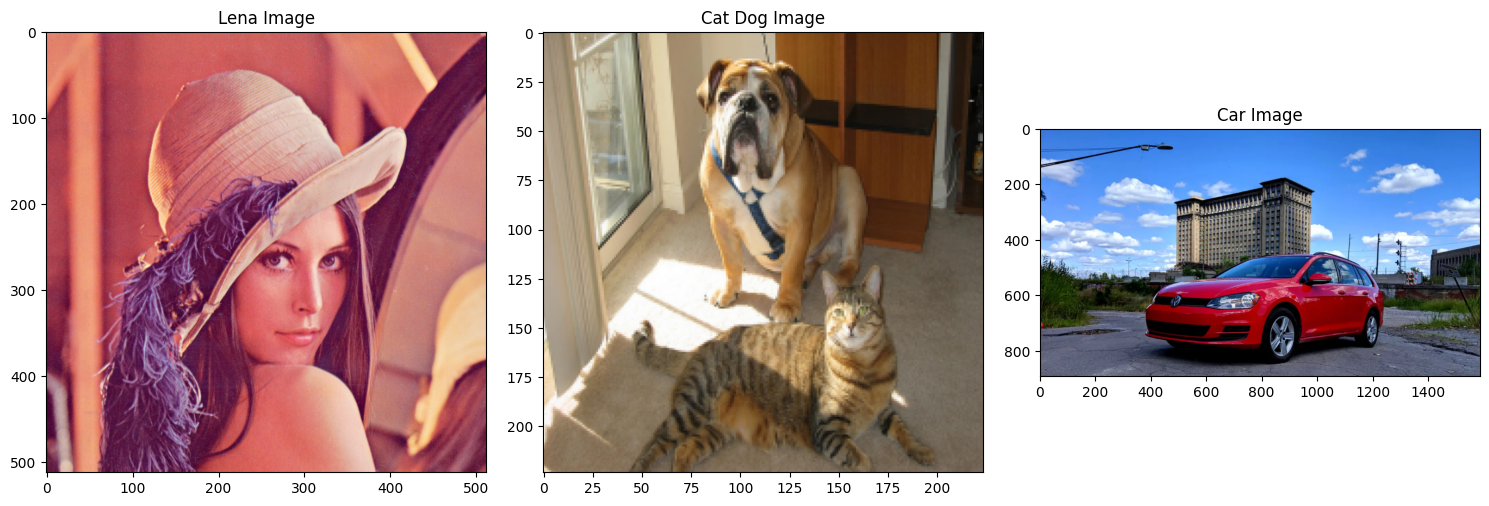

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(lena_img_np)
axes[0].set_title('Lena Image')
axes[0].axis('on')

axes[1].imshow(cat_dog_img_np)
axes[1].set_title('Cat Dog Image')
axes[1].axis('on')

axes[2].imshow(car_img_np)
axes[2].set_title('Car Image')
axes[2].axis('on')

plt.tight_layout()
plt.show()

## Select a Model

In [ ]:
timm.list_models("*in1k*", pretrained=True)

['bat_resnext26ts.ch_in1k',
 'beit3_base_patch16_224.in22k_ft_in1k',
 'beit3_base_patch16_224.indomain_in22k_ft_in1k',
 'beit3_large_patch16_224.in22k_ft_in1k',
 'beit3_large_patch16_224.indomain_in22k_ft_in1k',
 'beit_base_patch16_224.in22k_ft_in22k_in1k',
 'beit_base_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_224.in22k_ft_in22k_in1k',
 'beit_large_patch16_384.in22k_ft_in22k_in1k',
 'beit_large_patch16_512.in22k_ft_in22k_in1k',
 'beitv2_base_patch16_224.in1k_ft_in1k',
 'beitv2_base_patch16_224.in1k_ft_in22k',
 'beitv2_base_patch16_224.in1k_ft_in22k_in1k',
 'beitv2_large_patch16_224.in1k_ft_in1k',
 'beitv2_large_patch16_224.in1k_ft_in22k',
 'beitv2_large_patch16_224.in1k_ft_in22k_in1k',
 'botnet26t_256.c1_in1k',
 'caformer_b36.sail_in1k',
 'caformer_b36.sail_in1k_384',
 'caformer_b36.sail_in22k_ft_in1k',
 'caformer_b36.sail_in22k_ft_in1k_384',
 'caformer_m36.sail_in1k',
 'caformer_m36.sail_in1k_384',
 'caformer_m36.sail_in22k_ft_in1k',
 'caformer_m36.sail_in22k_ft_in1k_384'

In [ ]:
timm.list_models("*dino*", pretrained=True)

['convnext_base.dinov3_lvd1689m',
 'convnext_large.dinov3_lvd1689m',
 'convnext_small.dinov3_lvd1689m',
 'convnext_tiny.dinov3_lvd1689m',
 'resmlp_12_224.fb_dino',
 'resmlp_24_224.fb_dino',
 'vit_7b_patch16_dinov3.lvd1689m',
 'vit_7b_patch16_dinov3.sat493m',
 'vit_base_patch8_224.dino',
 'vit_base_patch14_dinov2.lvd142m',
 'vit_base_patch14_reg4_dinov2.lvd142m',
 'vit_base_patch16_224.dino',
 'vit_base_patch16_dinov3.lvd1689m',
 'vit_base_patch16_dinov3_qkvb.lvd1689m',
 'vit_giant_patch14_dinov2.lvd142m',
 'vit_giant_patch14_reg4_dinov2.lvd142m',
 'vit_huge_plus_patch16_dinov3.lvd1689m',
 'vit_huge_plus_patch16_dinov3_qkvb.lvd1689m',
 'vit_large_patch14_dinov2.lvd142m',
 'vit_large_patch14_reg4_dinov2.lvd142m',
 'vit_large_patch16_dinov3.lvd1689m',
 'vit_large_patch16_dinov3.sat493m',
 'vit_large_patch16_dinov3_qkvb.lvd1689m',
 'vit_large_patch16_dinov3_qkvb.sat493m',
 'vit_small_patch8_224.dino',
 'vit_small_patch14_dinov2.lvd142m',
 'vit_small_patch14_reg4_dinov2.lvd142m',
 'vit_smal

## Load the model

In [ ]:
model_id = "vit_base_patch14_reg4_dinov2.lvd142m"
# model_id = "vit_base_patch14_dinov2.lvd142m"
model = timm.create_model(model_id, pretrained=True)
model.eval()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.0, inplace=False)
  (patch_drop): Identity()
  (norm_pre): Identity()
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=768, out_features=2304, bias=True)
        (q_norm): Identity()
        (k_norm): Identity()
        (attn_drop): Dropout(p=0.0, inplace=False)
        (norm): Identity()
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (drop_path1): Identity()
      (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (drop1): Dropout(p=0.0, inplace=Fal

In [ ]:
# Check for the parameter by name
if hasattr(model, 'reg_token'):
    print(f"Registers found: {model.reg_token.shape}")
# In timm, it is often named 'reg_token' or similar depending on the version

Registers found: torch.Size([1, 4, 768])


In [ ]:
for name, param in model.named_parameters():
    if "cls" in name:
      print(name, param.shape)
    if "reg" in name:
      print(name, param.shape)

cls_token torch.Size([1, 1, 768])
reg_token torch.Size([1, 4, 768])


In [ ]:
1369+1+4

1374

In [ ]:
for name, param in model.named_parameters():

      print(name, param.shape)

cls_token torch.Size([1, 1, 768])
reg_token torch.Size([1, 4, 768])
pos_embed torch.Size([1, 1369, 768])
patch_embed.proj.weight torch.Size([768, 3, 14, 14])
patch_embed.proj.bias torch.Size([768])
blocks.0.norm1.weight torch.Size([768])
blocks.0.norm1.bias torch.Size([768])
blocks.0.attn.qkv.weight torch.Size([2304, 768])
blocks.0.attn.qkv.bias torch.Size([2304])
blocks.0.attn.proj.weight torch.Size([768, 768])
blocks.0.attn.proj.bias torch.Size([768])
blocks.0.ls1.gamma torch.Size([768])
blocks.0.norm2.weight torch.Size([768])
blocks.0.norm2.bias torch.Size([768])
blocks.0.mlp.fc1.weight torch.Size([3072, 768])
blocks.0.mlp.fc1.bias torch.Size([3072])
blocks.0.mlp.fc2.weight torch.Size([768, 3072])
blocks.0.mlp.fc2.bias torch.Size([768])
blocks.0.ls2.gamma torch.Size([768])
blocks.1.norm1.weight torch.Size([768])
blocks.1.norm1.bias torch.Size([768])
blocks.1.attn.qkv.weight torch.Size([2304, 768])
blocks.1.attn.qkv.bias torch.Size([2304])
blocks.1.attn.proj.weight torch.Size([768, 7

In [ ]:
HAS_REGISTERS = False
NUMBER_OF_REGISTERS = 0
for name, param in model.named_parameters():
    if "reg" in name:
      print(name, param.shape)
      HAS_REGISTERS = True
      NUMBER_OF_REGISTERS = param.shape[1]

print(f"{HAS_REGISTERS=}\n{NUMBER_OF_REGISTERS=}")

reg_token torch.Size([1, 4, 768])
HAS_REGISTERS=True
NUMBER_OF_REGISTERS=4


## Preprocess images

In [ ]:
# get model specific transforms (normalization, resize)
data_config = timm.data.resolve_model_data_config(model)
model_transforms = timm.data.create_transform(**data_config, is_training=False)


In [ ]:
lena_img_tensor = model_transforms(Image.open(lena_img_path))
cat_dog_img_tensor = model_transforms(Image.open(cat_dog_img_path))
car_img_tensor = model_transforms(Image.open(car_img_path))

In [ ]:
lena_img_tensor.shape

torch.Size([3, 518, 518])

## Load the finetuned head

We are using DinoV2 backbone, and the classifier is randomly intiailized, we need to train this head.

If we are going to finetune the head, we need to do this before adding hooks, otherwise the training will take much longer because of the additional computations in hooks in each forward pass.


In [ ]:
os.getcwd()

'/content/drive/MyDrive/Deep Learning Sample'

In [ ]:
NUM_CLASSES = len(CLS2IDX)  # 1000

# First, replace the head to match the checkpoint architecture
model.head = nn.Linear(
    in_features=model.blocks[-1].mlp.fc2.out_features,  # 768
    out_features=NUM_CLASSES,
    bias=True
)

# Load the trained weights
checkpoint_dir = "Checkpoints/dinov2_finetuned_best.pth"
model.load_state_dict(torch.load(checkpoint_dir, map_location='cpu'))

# Move to device and set to eval mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

model.model_id = model_id

In [ ]:
model.model_id

'vit_base_patch14_reg4_dinov2.lvd142m'

In [ ]:
checkpoint_dir

'Checkpoints/dinov2_finetuned_best.pth'

## Hooks to capture activations

In [ ]:
activations_od = OrderedDict()

In [ ]:
len(model._modules['blocks'])

12

In [ ]:
model._modules['blocks'][11]

Block(
  (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
  (attn): Attention(
    (qkv): Linear(in_features=768, out_features=2304, bias=True)
    (q_norm): Identity()
    (k_norm): Identity()
    (attn_drop): Dropout(p=0.0, inplace=False)
    (norm): Identity()
    (proj): Linear(in_features=768, out_features=768, bias=True)
    (proj_drop): Dropout(p=0.0, inplace=False)
  )
  (ls1): LayerScale()
  (drop_path1): Identity()
  (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
  (mlp): Mlp(
    (fc1): Linear(in_features=768, out_features=3072, bias=True)
    (act): GELU(approximate='none')
    (drop1): Dropout(p=0.0, inplace=False)
    (norm): Identity()
    (fc2): Linear(in_features=3072, out_features=768, bias=True)
    (drop2): Dropout(p=0.0, inplace=False)
  )
  (ls2): LayerScale()
  (drop_path2): Identity()
)

Here I am trying to capture activation, for a forward hook there are three inputs, the module the hook is applied to, input tensor to that module, and the output of that module, since we are need activation we need the output tensor of each layer.

Before writing the hook, you need to examine the model architecture

I am using hook_handles to keep track of the hooks that I register. At the end of the entire pipeline, I can remove the hooks easily.

If I don't remove hooks, each time I run this below code cell, new hook will be registerd resulting in duplicate outputs.

Since each hook adds computation, depending on the processing you do inside the hook, hooks can slow down inference/training

In [ ]:
hook_handles = []

In [ ]:
def get_activations(name:str):
  def activation_hook(module, input, output):
    activations_od[name] = output.detach()
  return activation_hook

In [ ]:

# Add hooks to all the blocks to layerwise activations
for i, block in enumerate(model._modules['blocks']):
  h = block.register_forward_hook(get_activations(f"block_{i}"))
  hook_handles.append(h)

## Hooks to capture Attention Maps

Attention Map is the most important place when it comes to information flow. Because information mixing (information from one token to another token flows throught attention maps) happens.

 \text{Softmax}(Q K^\top)

In [ ]:
model._modules['blocks'][11].attn

Attention(
  (qkv): Linear(in_features=768, out_features=2304, bias=True)
  (q_norm): Identity()
  (k_norm): Identity()
  (attn_drop): Dropout(p=0.0, inplace=False)
  (norm): Identity()
  (proj): Linear(in_features=768, out_features=768, bias=True)
  (proj_drop): Dropout(p=0.0, inplace=False)
)

In [ ]:
print(inspect.getsource(model._modules['blocks'][11].attn.forward))


    def forward(
            self,
            x: torch.Tensor,
            attn_mask: Optional[torch.Tensor] = None,
    ) -> torch.Tensor:
        B, N, C = x.shape
        qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, self.head_dim).permute(2, 0, 3, 1, 4)
        q, k, v = qkv.unbind(0)
        q, k = self.q_norm(q), self.k_norm(k)

        if self.fused_attn:
            x = F.scaled_dot_product_attention(
                q, k, v,
                attn_mask=attn_mask,
                dropout_p=self.attn_drop.p if self.training else 0.,
            )
        else:
            q = q * self.scale
            attn = q @ k.transpose(-2, -1)
            attn = maybe_add_mask(attn, attn_mask)
            attn = attn.softmax(dim=-1)
            attn = self.attn_drop(attn)
            x = attn @ v

        x = x.transpose(1, 2).reshape(B, N, C)
        x = self.norm(x)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x



In [ ]:
model._modules['blocks'][11].attn.fused_attn

True

In [ ]:
model._modules['blocks'][11].attn.fused_attn = False

Since `self.fused_attn` is `True`, we can't capture attention map directly. (We can do it by manually setting for all the layer_idx, `model._modules['blocks'][layer_idx].attn.fused_attn = False` and then directly capture `attn`, but for this example let's consider the worst case, when you can't capture attention map directly.)

This `F.scaled_dot_product_attention` does not inherit from `nn.Module()`, therefore we cannot define hooks for this

This is the line responsible for calculating q, k embeddings before calculating attention.

```q, k = self.q_norm(q), self.k_norm(k)```

In [ ]:
model._modules['blocks'][11].attn.q_norm

Identity()

In [ ]:
model._modules['blocks'][11].attn.k_norm

Identity()

If we register hooks for these layers, we can capture q, k embeddings separately. Then after some processing using

```python
q = q * self.scale
attn = q @ k.transpose(-2, -1)
```

We can get the attention map.

In [ ]:
attention_maps_od = OrderedDict()
q_embeddings_od = OrderedDict()
k_embeddings_od = OrderedDict()

In [ ]:
type(model._modules['blocks'][11].attn.scale), model._modules['blocks'][11].attn.scale

(float, 0.125)

In [ ]:
def get_query_activations(name:str, q_scale:float):
  def query_activation_hook(module, input, output):
    q_embeddings_od[name] = output.detach() * q_scale # Here we need to pass q_scale as well, just like in the source code
  return query_activation_hook

def get_key_activations(name:str):
  def key_activation_hook(module, input, output):
    k_embeddings_od[name] = output.detach()
  return key_activation_hook

In [ ]:

# Add hooks to all the blocks to layerwise activations
for i, block in enumerate(model._modules['blocks']):
  attn_block = block._modules['attn']
  # print(attn_block)
  # print(attn_block.scale)


  h1 = attn_block.q_norm.register_forward_hook(get_query_activations(f"block_{i}", attn_block.scale))
  h2 = attn_block.k_norm.register_forward_hook(get_key_activations(f"block_{i}"))
  hook_handles.append(h1)
  hook_handles.append(h2)


I am going to add another hooks to compute the attention map, right after the attention map. It is certain that the MLP layer is called right after the attention map. This might not be the best way to compute attn_map, But I need to compute along the forward pass

Note that I have ignored the attention mask, because in our case we are using an image, no need to mask tokens.

In [ ]:
def get_attention_maps(name:str):
  def compute_attn_map_hook(module, input, output):
    print(name)
    q = q_embeddings_od[name]
    k = k_embeddings_od[name]
    print("\tq shape", q.shape)
    print("\tk shape", k.shape)
    attn = q @ k.transpose(-2, -1)
    print("\tAttention Map shape before softmax", attn.shape)
    attention_maps_od[name] = attn.softmax(dim=-1)
    print("\tAttention Map shape after softmax", attention_maps_od[name].shape)


  return compute_attn_map_hook


In [ ]:
# Add hooks to trigger computing the attenion maps
for i, block in enumerate(model._modules['blocks']):

  mlp_block = block._modules['mlp']
  # Forward function of 'MLP' block is guranteed to call after Attention block, There are some implementations
  # layer(x) = MLP(x) + Attn(x) but in our case layer(x) = MLP(Attn(x)) ( I found this implementation in Moondream VLM model,
  # so please inspect carefully before using this way)

  h = mlp_block.register_forward_hook(get_attention_maps(f"block_{i}"))
  hook_handles.append(h)

## Inference

In [ ]:
x = cat_dog_img_tensor.unsqueeze(0)
with torch.inference_mode():
  output = model(x)


block_0
	q shape torch.Size([1, 12, 1374, 64])
	k shape torch.Size([1, 12, 1374, 64])
	Attention Map shape before softmax torch.Size([1, 12, 1374, 1374])
	Attention Map shape after softmax torch.Size([1, 12, 1374, 1374])
block_1
	q shape torch.Size([1, 12, 1374, 64])
	k shape torch.Size([1, 12, 1374, 64])
	Attention Map shape before softmax torch.Size([1, 12, 1374, 1374])
	Attention Map shape after softmax torch.Size([1, 12, 1374, 1374])
block_2
	q shape torch.Size([1, 12, 1374, 64])
	k shape torch.Size([1, 12, 1374, 64])
	Attention Map shape before softmax torch.Size([1, 12, 1374, 1374])
	Attention Map shape after softmax torch.Size([1, 12, 1374, 1374])
block_3
	q shape torch.Size([1, 12, 1374, 64])
	k shape torch.Size([1, 12, 1374, 64])
	Attention Map shape before softmax torch.Size([1, 12, 1374, 1374])
	Attention Map shape after softmax torch.Size([1, 12, 1374, 1374])
block_4
	q shape torch.Size([1, 12, 1374, 64])
	k shape torch.Size([1, 12, 1374, 64])
	Attention Map shape before so

In [ ]:
output.shape

torch.Size([1, 1000])

In [ ]:
predictions = output

In [ ]:
def print_top_classes(predictions, **kwargs):
    # Print Top-5 predictions
    prob = torch.softmax(predictions, dim=1)
    class_indices = predictions.data.topk(5, dim=1)[1][0].tolist()
    max_str_len = 0
    class_names = []
    for cls_idx in class_indices:
        class_names.append(CLS2IDX[cls_idx])
        if len(CLS2IDX[cls_idx]) > max_str_len:
            max_str_len = len(CLS2IDX[cls_idx])

    print('Top 5 classes:')
    for cls_idx in class_indices:
        output_string = '\t{} : {}'.format(cls_idx, CLS2IDX[cls_idx])
        output_string += ' ' * (max_str_len - len(CLS2IDX[cls_idx])) + '\t\t'
        output_string += 'value = {:.3f}\t prob = {:.1f}%'.format(predictions[0, cls_idx], 100 * prob[0, cls_idx])
        print(output_string)

In [ ]:
print_top_classes(output)

Top 5 classes:
	243 : bull mastiff   		value = 6.962	 prob = 41.7%
	242 : boxer          		value = 5.190	 prob = 7.1%
	254 : pug, pug-dog   		value = 3.868	 prob = 1.9%
	245 : French bulldog 		value = 3.265	 prob = 1.0%
	260 : chow, chow chow		value = 3.250	 prob = 1.0%


## Sanity Check

In [ ]:
model_transforms_dict = timm.data.resolve_model_data_config(model)
model_transforms_dict

{'input_size': (3, 518, 518),
 'interpolation': 'bicubic',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'crop_pct': 1.0,
 'crop_mode': 'center'}

In [ ]:
import torch
import matplotlib.pyplot as plt


def visualize_tensor(x, normalized=True):
    print("Input shape:", x.shape)

    # Remove batch dimension if present
    if x.dim() == 4 and x.shape[0] == 1:
        x = x[0]

    # Remove extra dim if shaped like (1, 3, 224, 224)
    while x.dim() > 3:
        x = x.squeeze(0)

    # Now x must be (3, H, W)
    if x.dim() != 3:
        raise ValueError(f"Expected 3D image tensor, got {x.dim()}D")

    # Denorm
    if normalized:
        mean = torch.tensor(model_transforms_dict['mean']).view(3,1,1)
        std  = torch.tensor(model_transforms_dict['std']).view(3,1,1)
        x = x * std + mean

    img = x.permute(1, 2, 0).clamp(0,1).cpu().numpy()

    plt.imshow(img)
    plt.axis("on")
    plt.show()

def sanity_check(x, predictions, categories=None, normalized=True):
    print("=== INPUT CHECK ===")
    print("shape:", x.shape)                          # (1, 3, 224, 224)
    print("dtype:", x.dtype)
    print("min / max / mean:", x.min().item(), x.max().item(), x.mean().item())
    print("contains NaNs:", torch.isnan(x).any().item())

    print("\n=== MODEL PREDICTIONS CHECK ===")
    print("predictions shape:", predictions.shape)              # (1, 1000)
    print("predictions contains NaNs:", torch.isnan(predictions).any().item())

    probs = torch.softmax(predictions, dim=1)
    print("softmax sum:", probs.sum().item())         # should be ~1

    top_prob, top_idx = probs.topk(5)
    print("\n=== TOP-5 PREDICTIONS ===")
    class_indices = predictions.data.topk(5, dim=1)[1][0].tolist()
    max_str_len = 0
    class_names = []
    for cls_idx in class_indices:
        class_names.append(CLS2IDX[cls_idx])
        if len(CLS2IDX[cls_idx]) > max_str_len:
            max_str_len = len(CLS2IDX[cls_idx])

    print('Top 5 classes:')
    for cls_idx in class_indices:
        output_string = '\t{} : {}'.format(cls_idx, CLS2IDX[cls_idx])
        output_string += ' ' * (max_str_len - len(CLS2IDX[cls_idx])) + '\t\t'
        output_string += 'value = {:.3f}\t prob = {:.1f}%'.format(predictions[0, cls_idx], 100 * probs[0, cls_idx])
        print(output_string)

    print("\n=== VISUALIZATION ===")
    visualize_tensor(x, normalized=normalized)


=== INPUT CHECK ===
shape: torch.Size([1, 3, 518, 518])
dtype: torch.float32
min / max / mean: -2.1179039478302 2.640000104904175 0.010741130448877811
contains NaNs: False

=== MODEL PREDICTIONS CHECK ===
predictions shape: torch.Size([1, 1000])
predictions contains NaNs: False
softmax sum: 1.0

=== TOP-5 PREDICTIONS ===
Top 5 classes:
	243 : bull mastiff   		value = 6.962	 prob = 41.7%
	242 : boxer          		value = 5.190	 prob = 7.1%
	254 : pug, pug-dog   		value = 3.868	 prob = 1.9%
	245 : French bulldog 		value = 3.265	 prob = 1.0%
	260 : chow, chow chow		value = 3.250	 prob = 1.0%

=== VISUALIZATION ===
Input shape: torch.Size([1, 3, 518, 518])


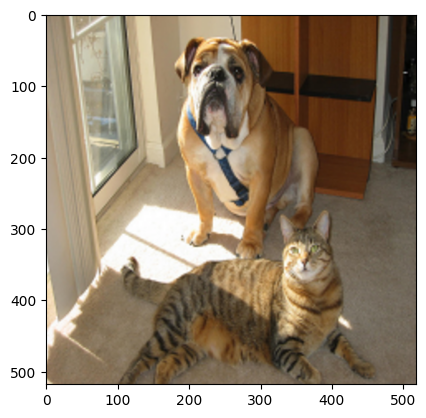

In [ ]:
sanity_check(x, predictions=output, normalized=True)

## Delete Hooks

In [ ]:
for h in hook_handles:
    h.remove()


## Process Hooks Outputs

In [ ]:
for k, v in activations_od.items():
    print(k, v.shape)


block_0 torch.Size([1, 1374, 768])
block_1 torch.Size([1, 1374, 768])
block_2 torch.Size([1, 1374, 768])
block_3 torch.Size([1, 1374, 768])
block_4 torch.Size([1, 1374, 768])
block_5 torch.Size([1, 1374, 768])
block_6 torch.Size([1, 1374, 768])
block_7 torch.Size([1, 1374, 768])
block_8 torch.Size([1, 1374, 768])
block_9 torch.Size([1, 1374, 768])
block_10 torch.Size([1, 1374, 768])
block_11 torch.Size([1, 1374, 768])


## Visualize Activations

### Activation Visualization for one layer

In [ ]:
# Remove batch dimension & Removd [CLS] token & take mean so that I can get one 1 vector
activation_patches = activations_od['block_0'].squeeze(0)[1+NUMBER_OF_REGISTERS:,:].mean(dim=-1)
activation_patches.shape # [196]

NUM_PATCHES = int(math.sqrt(activation_patches.shape[0]))
NUM_PATCHES # 14

IMG_SIZE = lena_img_tensor.shape[-1] # 518

PATCH_SIZE = int(activation_patches.shape[0] / NUM_PATCHES) # 16

In [ ]:
activation_patches.shape

torch.Size([1369])

In [ ]:
NUM_PATCHES

37

In [ ]:
# Reshape to 2D grid
activation_grid = activation_patches.view(NUM_PATCHES, NUM_PATCHES)  # [14, 14]



In [ ]:
INTERPOLATION_METHOD = 'nearest'  # ['nearest' , 'bilinear' ]

activation_map = activation_grid.unsqueeze(0).unsqueeze(0)  # [1, 1, 14, 14]

if INTERPOLATION_METHOD == 'nearest':
  # Upsample to image size using nearest neighbor (each value becomes 16x16 block)
  activation_resized = F.interpolate(
      activation_map,
      size=(IMG_SIZE, IMG_SIZE),  # [224, 224]
      mode='nearest'
  ) # [1, 1, 224, 224]

elif INTERPOLATION_METHOD == 'bilinear':
  activation_resized = F.interpolate(
    activation_map,
    size=(IMG_SIZE, IMG_SIZE),  # [224, 224]
    mode='bilinear',
    align_corners=False
)

activation_resized = activation_resized.squeeze()  # [224, 224]



In [ ]:
activation_resized.shape

torch.Size([518, 518])

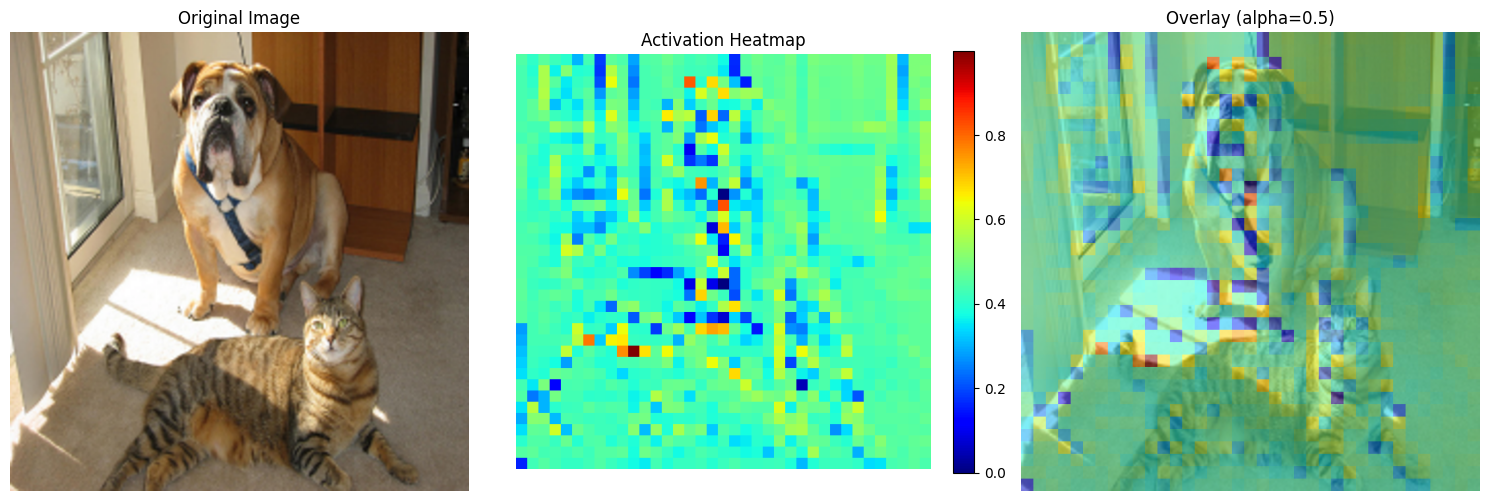

In [ ]:
def visualize_activation_overlay(x, activation_map, normalized=True, alpha=0.5, cmap='jet'):
    """
    Overlay activation heatmap on original image

    Args:
        x: Image tensor (1, 3, 224, 224) or (3, 224, 224)
        activation_map: Activation heatmap (224, 224)
        normalized: Whether x is ImageNet normalized
        alpha: Transparency of heatmap (0=invisible, 1=opaque)
        cmap: Colormap for heatmap ('jet', 'viridis', 'hot', etc.)
    """
    # Process image
    if x.dim() == 4 and x.shape[0] == 1:
        x = x[0]

    # Denormalize if needed
    if normalized:
        mean = torch.tensor(model_transforms_dict['mean']).view(3,1,1)
        std  = torch.tensor(model_transforms_dict['std']).view(3,1,1)
        x = x * std + mean

    # Convert to numpy (H, W, 3)
    img = x.permute(1, 2, 0).clamp(0, 1).cpu().numpy()

    # Normalize activation map to [0, 1]
    act = activation_map.cpu().numpy()
    act = (act - act.min()) / (act.max() - act.min() + 1e-8)

    # Create figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Original image
    axes[0].imshow(img)
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    # Heatmap only
    heatmap = axes[1].imshow(act, cmap=cmap)
    axes[1].set_title('Activation Heatmap')
    axes[1].axis('off')
    plt.colorbar(heatmap, ax=axes[1], fraction=0.046)

    # Overlay
    axes[2].imshow(img)
    axes[2].imshow(act, cmap=cmap, alpha=alpha)
    axes[2].set_title(f'Overlay (alpha={alpha})')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()


visualize_activation_overlay(x, activation_resized, normalized=True, alpha=0.5)

### Activation Visualization over layers

In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn.functional as F
import math

def visualize_all_layers(x, activations_od, normalized=True, alpha=0.5, cmap='jet', interpolation='bilinear'):
    """
    Visualize activation heatmaps for all layers

    Args:
        x: Image tensor (1, 3, 224, 224)
        activations_od: OrderedDict with activations from all layers
        normalized: Whether x is ImageNet normalized
        alpha: Transparency of overlay
        cmap: Colormap for heatmap
        interpolation: 'nearest' or 'bilinear'
    """
    # Process original image once
    if x.dim() == 4 and x.shape[0] == 1:
        x_img = x[0]

    if normalized:
        x_img = model_transforms(x_img)

    img = x_img.permute(1, 2, 0).clamp(0, 1).cpu().numpy()

    # Get number of layers
    num_layers = len(activations_od)

    # Create figure: 2 rows (heatmap, overlay) x num_layers columns
    fig, axes = plt.subplots(2, num_layers, figsize=(4 * num_layers, 8))

    # Handle single layer case
    if num_layers == 1:
        axes = axes.reshape(2, 1)

    for idx, (layer_name, activation_tensor) in enumerate(activations_od.items()):
        # Process activation
        # Remove batch dimension & Remove [CLS] token & take mean
        activation_patches = activation_tensor.squeeze(0)[1+NUMBER_OF_REGISTERS:, :].mean(dim=-1)  # [196] or [N]


        NUM_PATCHES = int(math.sqrt(activation_patches.shape[0]))
        IMG_SIZE = x.shape[-1]  # 224

        # Reshape to 2D grid
        activation_grid = activation_patches.view(NUM_PATCHES, NUM_PATCHES)

        # Upsample to image size
        activation_map = activation_grid.unsqueeze(0).unsqueeze(0)

        if interpolation == 'nearest':
            activation_resized = F.interpolate(
                activation_map,
                size=(IMG_SIZE, IMG_SIZE),
                mode='nearest'
            )
        else:  # bilinear
            activation_resized = F.interpolate(
                activation_map,
                size=(IMG_SIZE, IMG_SIZE),
                mode='bilinear',
                align_corners=False
            )

        activation_resized = activation_resized.squeeze()  # [224, 224]

        # Normalize activation to [0, 1]
        act = activation_resized.cpu().numpy()
        act = (act - act.min()) / (act.max() - act.min() + 1e-8)

        # Row 0: Heatmap only
        im = axes[0, idx].imshow(act, cmap=cmap)
        axes[0, idx].set_title(f'{layer_name}\nHeatmap')
        axes[0, idx].axis('on')
        plt.colorbar(im, ax=axes[0, idx], fraction=0.046)

        # Row 1: Overlay
        axes[1, idx].imshow(img)
        axes[1, idx].imshow(act, cmap=cmap, alpha=alpha)
        axes[1, idx].set_title(f'{layer_name}\nOverlay')
        axes[1, idx].axis('on')

    plt.tight_layout()
    fig.suptitle(f"{model.model_id}; Activation Maps", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # adjust so title doesn't overlap
    plt.show()



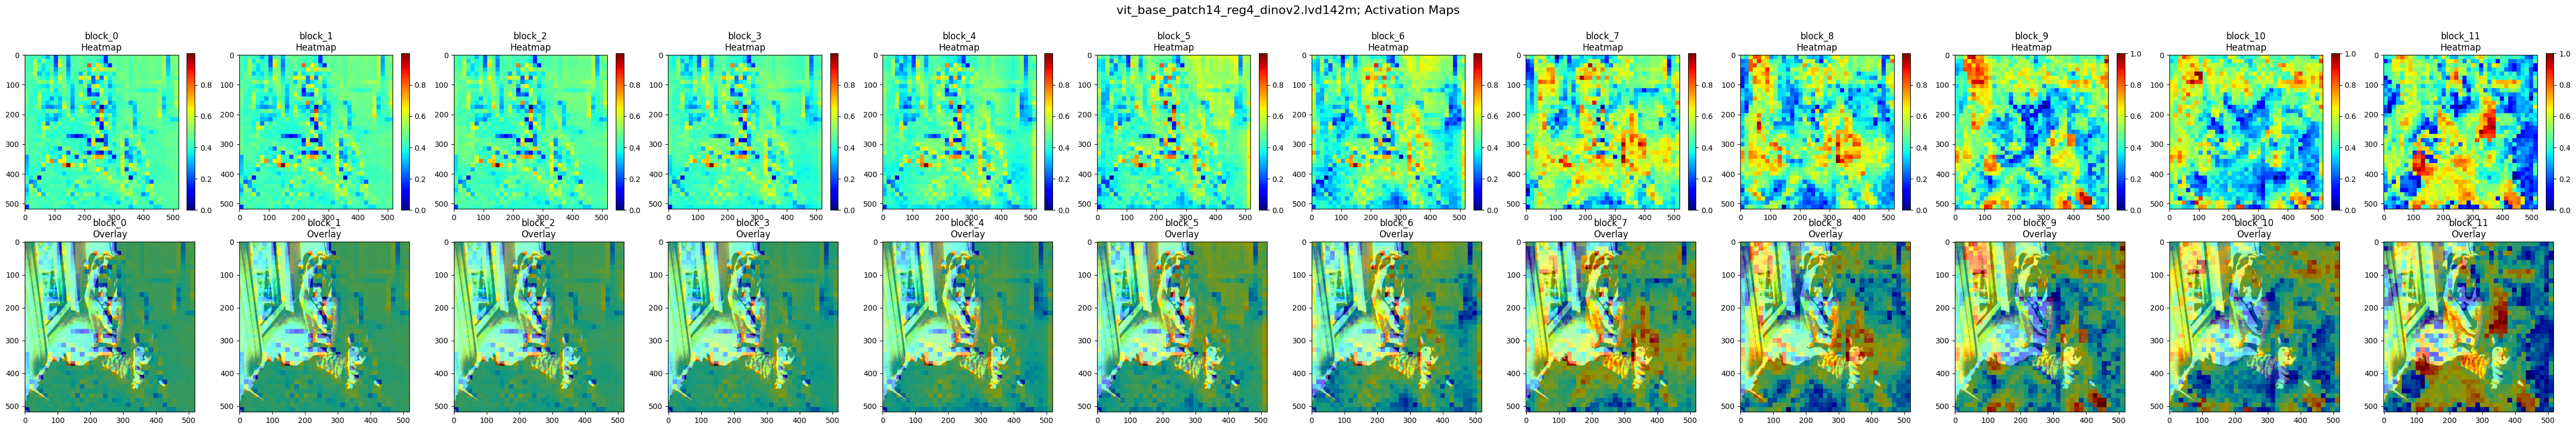

In [ ]:
visualize_all_layers(x, activations_od, normalized=True, alpha=0.6, interpolation='nearest') # Here there is a bug in mean error


block_0:
  Mean: -0.0005
  Std:  0.0076
  Min:  -0.0380
  Max:  0.0487
  Range: 0.0867

block_1:
  Mean: -0.0004
  Std:  0.0077
  Min:  -0.0386
  Max:  0.0487
  Range: 0.0873

block_2:
  Mean: -0.0004
  Std:  0.0077
  Min:  -0.0391
  Max:  0.0484
  Range: 0.0875

block_3:
  Mean: 0.0011
  Std:  0.0079
  Min:  -0.0378
  Max:  0.0513
  Range: 0.0891

block_4:
  Mean: -0.0005
  Std:  0.0085
  Min:  -0.0384
  Max:  0.0477
  Range: 0.0861

block_5:
  Mean: -0.0066
  Std:  0.0087
  Min:  -0.0427
  Max:  0.0358
  Range: 0.0786

block_6:
  Mean: -0.0094
  Std:  0.0106
  Min:  -0.0468
  Max:  0.0361
  Range: 0.0829

block_7:
  Mean: -0.0207
  Std:  0.0133
  Min:  -0.0666
  Max:  0.0246
  Range: 0.0913

block_8:
  Mean: -0.0354
  Std:  0.0217
  Min:  -0.0994
  Max:  0.0367
  Range: 0.1361

block_9:
  Mean: -0.0455
  Std:  0.0489
  Min:  -0.1877
  Max:  0.1138
  Range: 0.3015

block_10:
  Mean: -0.1238
  Std:  0.0734
  Min:  -0.3321
  Max:  0.1262
  Range: 0.4583

block_11:
  Mean: -0.2851
  Std

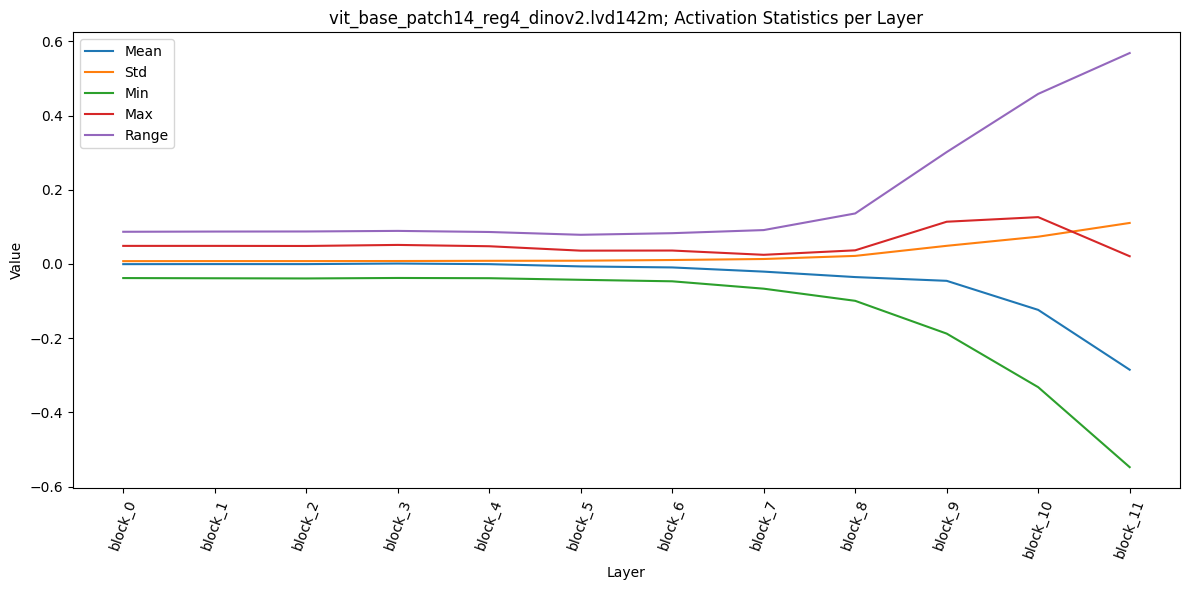

In [ ]:
# Check activation statistics for each layer
import matplotlib.pyplot as plt

# Store stats
layers = []
means = []
stds = []
mins = []
maxs = []
ranges = []

for layer_name, activation_tensor in activations_od.items():
    activation_patches = activation_tensor.squeeze(0)[1+NUMBER_OF_REGISTERS:, :].mean(dim=-1)

    m = activation_patches.mean().item()
    s = activation_patches.std().item()
    mn = activation_patches.min().item()
    mx = activation_patches.max().item()
    rg = mx - mn

    print(f"\n{layer_name}:")
    print(f"  Mean: {m:.4f}")
    print(f"  Std:  {s:.4f}")
    print(f"  Min:  {mn:.4f}")
    print(f"  Max:  {mx:.4f}")
    print(f"  Range: {rg:.4f}")

    layers.append(layer_name)
    means.append(m)
    stds.append(s)
    mins.append(mn)
    maxs.append(mx)
    ranges.append(rg)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(layers, means, label="Mean")
plt.plot(layers, stds, label="Std")
plt.plot(layers, mins, label="Min")
plt.plot(layers, maxs, label="Max")
plt.plot(layers, ranges, label="Range")
plt.xticks(rotation=70)
plt.xlabel("Layer")
plt.ylabel("Value")
plt.title(f"{model.model_id}; Activation Statistics per Layer")
plt.legend()
plt.tight_layout()
plt.show()


## Visualize Attention Maps


In [ ]:
len(attention_maps_od)

12

In [ ]:
attention_maps_od['block_0'].shape

torch.Size([1, 12, 1374, 1374])

In [ ]:
model.patch_embed

PatchEmbed(
  (proj): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
  (norm): Identity()
)

In [ ]:
model.blocks[0].attn.num_heads

12

When image is processed in ViT-Tiny to get patch embeddings, `Conv2d` layer is used with 192 filters with 3 kernels per each filter (16x16) with stride 16.

So in the later layers, we have 192 features to process. In each layer, there are `3` heads. Therefore each head is responsible for processing 192/3 = 64 features. This results in one attention map per each attention head.

Notice in `attention_maps_od['block_0'].shape` = (1, 3, 197, 197) `3` is the number of attention maps (number of attention heads) per layer, and `197` refers to the number of tokens.

197 = [CLS] token + 196 image Patch tokens (In ViT)

If we considered DeiT model, there should be another token responsible for distillation.

### Visualize Attention Map of a Single Layer

In [ ]:
# Sanity check to see whether the sum is 1 along the row axis (Considering only one attention head)
attention_maps_od['block_0'].squeeze(0)[0, 0, :].sum()

tensor(1.0000)

In [ ]:
# Get the mean about heads
attention_maps_od['block_0'].squeeze(0)[:, :, :].mean(dim=0).shape

torch.Size([1374, 1374])

In [ ]:
# Only consider the first row because first row is "How [CLS] token attends to itself and other image patch tokens"
attention_maps_od['block_0'].squeeze(0)[:, : , :].mean(dim=0)[0,:].shape

torch.Size([1374])

In [ ]:
# Now we can remove the first element of this row, that elements shows how [CLS] token attends to itself
attn_slice = attention_maps_od['block_0'].squeeze(0)[:, : , :].mean(dim=0)[0,1+NUMBER_OF_REGISTERS:]
attn_slice.shape

torch.Size([1369])

In [ ]:
# now I am going to use softmax so that we will get a new probability distribtution after removing the first element
attn_slice = F.softmax(attn_slice, dim=0)
attn_slice.shape

torch.Size([1369])

In [ ]:
NUM_PATCHES = int(math.sqrt(attention_maps_od['block_0'].squeeze(0)[:, : , :].mean(dim=0)[0,1:].shape[0]))
attn_slice = attn_slice.view(NUM_PATCHES, NUM_PATCHES)
attn_slice.shape

torch.Size([37, 37])

In [ ]:
for k, v in attention_maps_od.items():
    print(k, v.shape)

block_0 torch.Size([1, 12, 1374, 1374])
block_1 torch.Size([1, 12, 1374, 1374])
block_2 torch.Size([1, 12, 1374, 1374])
block_3 torch.Size([1, 12, 1374, 1374])
block_4 torch.Size([1, 12, 1374, 1374])
block_5 torch.Size([1, 12, 1374, 1374])
block_6 torch.Size([1, 12, 1374, 1374])
block_7 torch.Size([1, 12, 1374, 1374])
block_8 torch.Size([1, 12, 1374, 1374])
block_9 torch.Size([1, 12, 1374, 1374])
block_10 torch.Size([1, 12, 1374, 1374])
block_11 torch.Size([1, 12, 1374, 1374])


In [ ]:
def visualize_attention_overlay_simple(x, attn_slice, normalized=True, alpha=0.6, cmap='jet', interpolation='nearest'):
    """Simple single-plot overlay"""
    # Process image
    if x.dim() == 4 and x.shape[0] == 1:
        x_img = x[0]

    if normalized:
        mean = torch.tensor(model_transforms_dict['mean']).view(3, 1, 1)
        std = torch.tensor(model_transforms_dict['std']).view(3, 1, 1)
        x_img = x_img * std + mean

    img = x_img.permute(1, 2, 0).clamp(0, 1).cpu().numpy()

    # Upsample attention
    IMG_SIZE = x.shape[-1]
    attn_map = attn_slice.unsqueeze(0).unsqueeze(0)

    if interpolation == 'bilinear':
        attn_resized = F.interpolate(attn_map, size=(IMG_SIZE, IMG_SIZE),
                                     mode='bilinear', align_corners=False)
    elif interpolation == 'nearest':
        attn_resized = F.interpolate(attn_map, size=(IMG_SIZE, IMG_SIZE), mode='nearest')

    attn_resized = attn_resized.squeeze().cpu().numpy()

    # Plot
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.imshow(attn_resized, cmap=cmap, alpha=alpha)
    plt.axis('off')
    plt.colorbar(fraction=0.046)
    plt.title('Attention Map Overlay')
    plt.show()



In [ ]:
attn_slice.shape

torch.Size([37, 37])

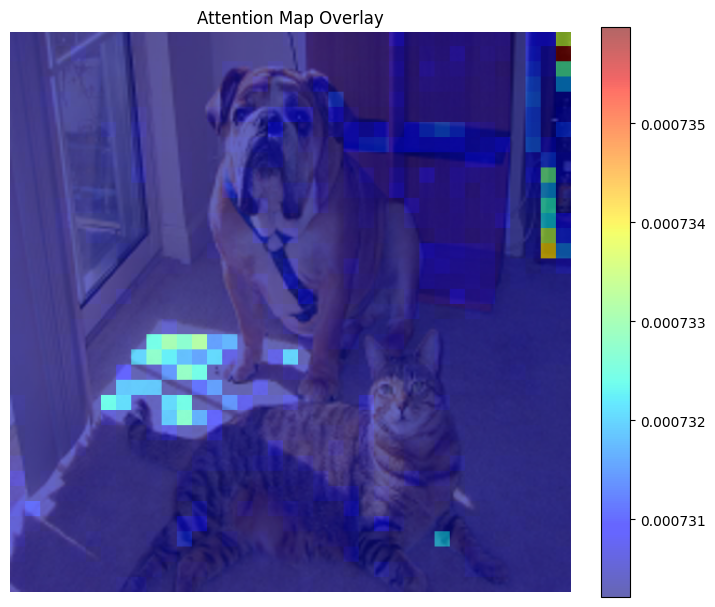

In [ ]:
# Usage
visualize_attention_overlay_simple(x, attn_slice, alpha=0.6)

In [ ]:
attn_slice.shape

torch.Size([37, 37])

In [ ]:
# Check if attention slice values are properly normalized
print(f"Attention shape: {attn_slice.shape}")
print(f"Min: {attn_slice.min():.4f}")
print(f"Max: {attn_slice.max():.4f}")
print(f"Mean: {attn_slice.mean():.4f}")
print(f"Sum: {attn_slice.sum():.4f}")  # Should be ~1.0 if normalized across patches

Attention shape: torch.Size([37, 37])
Min: 0.0007
Max: 0.0007
Mean: 0.0007
Sum: 1.0000


### Visualize Attention Maps over all the layers

In [ ]:
attention_rollout_mat = []

In [ ]:
sasika_tensor.sum()

NameError: name 'sasika_tensor' is not defined

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

def visualize_attention_grid(x, attention_maps_od, normalized=True, alpha=0.6, cmap='jet', interpolation='nearest'):
    """
    Visualize attention maps across layers in a grid.
    - Horizontal axis: layers
    - Vertical axis: top row = attention heatmap, bottom row = overlay with original image
    """
    # Process image
    x_img = x[0]
    if normalized:
        mean = torch.tensor(model_transforms_dict['mean']).view(3, 1, 1)
        std = torch.tensor(model_transforms_dict['std']).view(3, 1, 1)
        x_img = x_img * std + mean
    img = x_img.permute(1, 2, 0).clamp(0, 1).cpu().numpy()

    num_layers = len(attention_maps_od)
    fig, axes = plt.subplots(2, num_layers, figsize=(4*num_layers, 8))

    if num_layers == 1:
        axes = axes[:, None]  # ensure axes is 2D

    sasika_tensor = torch.ones(NUM_PATCHES, NUM_PATCHES)

    for col, (layer_name, attn_tensor) in enumerate(attention_maps_od.items()):


        # Average over heads
        row_id = 0 # only choose the first row;because that is where CLS attendance happens

        attn_slice = attn_tensor.squeeze(0).mean(dim=0)[row_id, 1+NUMBER_OF_REGISTERS:]  # remove CLS token + REGISTER_TOKENS

        # Upsample
        N = int((attn_slice.shape[0])**0.5)
        attn_map = attn_slice.view(1, 1, N, N)

        print(attn_map.shape)

        sasika_tensor *= attn_map.squeeze()


        if interpolation == 'bilinear':
            attn_resized = F.interpolate(attn_map, size=(x.shape[-1], x.shape[-1]),
                                         mode='bilinear', align_corners=False)
        else:
            attn_resized = F.interpolate(attn_map, size=(x.shape[-1], x.shape[-1]), mode='nearest')
        attn_resized = attn_resized.squeeze().cpu().numpy()


        # Top row: attention heatmap
        im = axes[0, col].imshow(attn_resized, cmap=cmap)
        axes[0, col].axis('on')
        axes[0, col].set_title(f'{layer_name} Heatmap', fontsize=10)
        plt.colorbar(im, ax=axes[0, col], fraction=0.046)

        # Bottom row: overlay
        axes[1, col].imshow(img)
        axes[1, col].imshow(attn_resized, cmap=cmap, alpha=alpha)
        axes[1, col].axis('on')
        axes[1, col].set_title(f'{layer_name} Overlay', fontsize=10)

    fig.suptitle(f"{model.model_id}; [CLS] Token Attendance", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # adjust so title doesn't overlap
    plt.show()

    return sasika_tensor


In [ ]:
l = visualize_attention_grid(x, attention_maps_od)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.imshow(l.cpu().numpy(), cmap="jet")  # convert to numpy if on GPU
plt.colorbar()
plt.title("Heatmap")
plt.axis("on")  # optional, shows axis ticks
plt.show()


In [ ]:
l.unsqueeze(0).unsqueeze(0).shape

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(15, 5))

attn_resized = F.interpolate(
    l.unsqueeze(0).unsqueeze(0),
    size=(x.shape[-1], x.shape[-1]),
    mode='nearest'
).squeeze().cpu().numpy()

col = 0
cmap = "jet"

im = axes[col].imshow(attn_resized, cmap=cmap)
axes[col].axis('on')
axes[col].set_title(f'{layer_name} Heatmap', fontsize=10)

fig.colorbar(im, ax=axes[col], fraction=0.046)   # <-- use fig.colorbar()


In [ ]:
l.shape

In [ ]:
len(attention_rollout_mat)

In [ ]:
model.model_id

## Rollout

In [ ]:
attention_maps_od['block_0'].shape

In [ ]:
len(attention_maps_od)

In [ ]:
avg_attention_maps = []

for layer_name, attn_tensor in attention_maps_od.items():
    # print(layer_name, attn_tensor.shape)
    avg_attn = attn_tensor.squeeze(0).mean(dim=0)
    # print(avg_attn.shape)
    avg_attention_maps.append(avg_attn)


In [ ]:
avg_attention_maps[0].shape

In [ ]:
explainability_map = avg_attention_maps[0]
for layer_id in range(1, len(avg_attention_maps)):
  explainability_map *= avg_attention_maps[layer_id]*255


In [ ]:
print(f"shape: {explainability_map.shape}")
print(f"mean:  {explainability_map.mean().item():.6f}")
print(f"max:   {explainability_map.max().item():.6f}")
print(f"min:   {explainability_map.min().item():.6f}")
print(f"range: {(explainability_map.max() - explainability_map.min()).item():.6f}")


In [ ]:
# There's a normalization error here

In [ ]:
explainability_map[0,5:].max()